In this post, we will develop a simple ray tracing model, which can be a very useful tool in many domains. For instance in acoustics, optics, fluids dynamics... Why so many different domains? Well, this is related to the fact that under certain hypotheses (high frequency and paraxial approximations) waves (light, sound, water...) behave like rays.

# Modelling our ray tracer

There's many good introductions to ray tracing, but here we will define things as we go. The way we want to trace rays is very basic. Essentially, we want to be able to:

- draw any geometry 
- account for different wave speeds in different matters

To do this, we will model the geometry as a sequence of oriented segments, with wave speed properties on each side of the segment. Any type of geometry will thus be represented as a list of segments. Also, we will only work in 2d.

A single segment might be modelled as follows:

In [1]:
class Segment:
    "A class representing segments."
    def __init__(self, A, B, normal_vector, celerity_front, celerity_back):
        "Inits a segment from A to B, with a normal vector and front and back celerities."
        self.A = A
        self.B = B
        self.normal_vector = normal_vector
        self.celerity_front = celerity_front
        self.celerity_back = celerity_back

A sphere would thus be represented by a sequence of segments. Any geometry could thus just be a list of segments.

So how does one trace a ray? There's three things here:

- intersection of a ray with a segment
- refraction
- reflection

Let's tackle these. But first, we need to define a ray.

# Defining a ray

A ray needs an origin and an end.

In [2]:
class Ray:
    "A class representing a ray."
    def __init__(self, origin, end):
        self.origin = origin
        self.end = end

Finally, we also need sources of rays, which are defined by a point and a direction, which is an unit vector.

In [3]:
class Source:
    "A ray source."
    def __init__(self, origin, direction):
        self.origin = origin
        self.direction = direction

Finally, we also need points:

In [4]:
from collections import namedtuple

Point = namedtuple('Point', 'x, y')

In [5]:
Point(1, 2)

Point(x=1, y=2)

And vectors:

In [6]:
Vector = namedtuple('Vector', 'u_x, u_y')

In [7]:
Vector(3., 2.4)

Vector(u_x=3.0, u_y=2.4)

# Intersection of a source with a segment to create a ray

Once we have a source, we can trace it until a segment with which it intersects. The intersection point allows us to return a ray.

In [8]:
def trace_ray(source, geometric_object):
    "Traces a ray from a source to a geometric object."
    intersected_segment = min(geometric_object.segments, key=lambda seg: tof(source, seg))
    intersection_point = intersection(source, intersected_segment)
    return Ray(source.origin, intersection_point)

# TODO: tof function, intersection function

Let's now turn to the intersection function. Our rays are always straight lines. So it is easy to come up with a way for intersecting a line.

In [9]:
def intersection(source, segment):
    "Computes the intersection point between a source and a segment."
    # they're parallel: no intersection or infinity
    if scalar(source.direction, segment.normal_vector) == 0.:
        return None
    else:

SyntaxError: unexpected EOF while parsing (<ipython-input-9-30eed575786f>, line 6)

In [10]:
A = Point(0, 0)
B = Point(5, 0)
S = Point(1, -4)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [12]:
def draw_points(points, labels=None):
    "Draws a list of points with labels."
    if labels is None:
        labels = ['Point {}'.format(ind) for ind, val in enumerate(points)]
    for p, label in zip(points, labels):
        plt.plot(p.x, p.y, 'o', label=label)

(-5, 1)

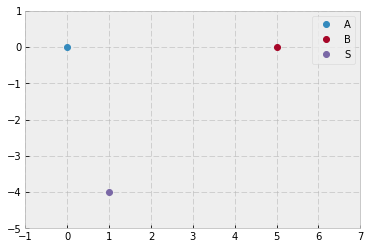

In [13]:
draw_points([A, B, S], ['A', 'B', 'S'])
plt.legend()
plt.xlim(-1, 7)
plt.ylim(-5, 1)

In [14]:
AB = 

SyntaxError: invalid syntax (<ipython-input-14-318c53a6be6f>, line 1)

Information about line intersections can be found here:

<http://geomalgorithms.com/a05-_intersect-1.html>

I thing this is the way to go.

# Creating a nice visualization 

Drawing rays that intersect a straight wall.

In [ ]:
s = Point(0, 0)
east = Vector(1, 0)
source = Source(s, direction=east, aperture=(-30, 30), n=11)
top = Point(1, 1)
bottom = Point(1, -1)
wall = Segment(top, bottom)
rays = Intersect(source, wall)
plot(rays)

Drawing rays that get focused by spherical shell.

In [ ]:
s = Point(0, 0)
east = Vector(1, 0)
source = Source(s, direction=east, aperture=(-30, 30), n=11)
top = Point(1, 1)
bottom = Point(1, -1)
wall = Segment(top, bottom)
rays = Intersect(source, wall)
plot(rays)